# Airbnb Fair Price Evaluation

With this project, I intend to achieve predicting the competitive **daily accomodation rate** for a client's house in Bondi Beach. The owner currently charges $500. We need to estimate a **fair value** that the owner should be charging. From the information gathered, the house has the following characteristics and constraints. As we develop the model, we could  effectively create a recommendation model for all prospective hosts!

1. The owner has been a host since August 2010
2. The location is lon:151.274506, lat:33.889087
3. The current review score rating 95.0
4. Number of reviews 53
5. Minimum nights 4
6. The house can accomodate 10 people.
7. The owner currently charges a cleaning fee of 370
8. The house has 3 bathrooms, 5 bedrooms, 7 beds.
9. The house is available for 255 of the next 365 days
10. The client is verified, and they are a superhost.
11. The cancelation policy is strict with a 14 days grace period.
12. The host requires a security deposit of $1,500
13. All values strictly apply to the month of July 2018

The first thought that comes to my mind is to apply KNN and come up with a fair price for listings. **But hold on**! We know that our ML model is just as good as our data. So first, let us explore the dataset and later worry about using an appropriate ML algorithm.

# Initial set-up

In [82]:
# Common imports
import pandas as pd
import numpy as np
import os
import re

# Map and other visualizations to plot pretty figures
import geopandas as gpd
from shapely.geometry import Point, Polygon

import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# To make this notebook's output stable across runs
np.random.seed(42)

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Where to save the figures

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    except:
        plt.savefig(fig_id + "." + fig_extension, format=fig_extension, dpi=resolution)

# Fetch data

In [84]:
df = pd.read_csv("datasets/sydney_airbnb.csv")

In [202]:
# Set option to view all columns present in the datatset
pd.set_option('display.max_columns', 200)

# Data preprocessing

Let us do some feature engineering.

In [86]:
# What questions to ask?

# Compare common words used in summary/space/description/neighbourhood_overview/notes and 
# other text columns with most frequently booked vs least booked or high rated vs low rated

# location/neighbourhood pricing

# pricing vs review score

From the above we observe that about 50% of **host_response_rate** column is empty. Also, 90% of **square_feet** column is empty. Let us drop them and all other columns that have text within them.

In [87]:
columns_to_drop = ['host_response_rate', 'square_feet', 'id', 'listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_response_time', 'host_thumbnail_url', 'host_location', 'host_about', 'host_picture_url', 'host_verifications', 'street', 'neighbourhood_group_cleansed', 'amenities']
data = df.drop(columns_to_drop, axis=1)

# Feature Engineering

In [88]:
boolean_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'has_availability', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

# Convert columns with values 't', 'f' to 1,0 respectively, as the numeric format is required for feature evaluation tests.
# Any missing values get imputed to 0
for col_name in boolean_columns:
    data[col_name] = data[col_name].apply(lambda x: 1 if x=='t' else 0)

Columns like price, weekly_price, cleaning_fee etc., are strings and start with '$'. Let us convert them to a float.

In [89]:
price_columns = ['price', 'weekly_price', 'monthly_price', 'cleaning_fee', 'security_deposit', 'extra_people']

# Do a regex operation to extract numerical value and assign 0 to missing and negative values
def get_price_as_float(x):
    x = x if x else 0
    
    x = float(re.compile('[^0-9eE.-]').sub('', str(x)))
    if x < 0: # Convert negative value to 0
        x = 0
       
    return x

for col_name in price_columns:
    data[col_name] = data[col_name].fillna(0)
    data[col_name] = data[col_name].apply(lambda x: get_price_as_float(x))

In [90]:
# Convert columns like host_since to a date time format

date_time_columns = ['first_review', 'last_review', 'host_since']

for col_name in date_time_columns:
    data[col_name] = pd.to_datetime(data[col_name])

In [91]:
# To-DO: Let us do a chisquared

# chi_2_data = data.drop(date_time_columns, axis=1)

# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# bestfeatures = SelectKBest(score_func=chi2, k=40)
# fit = bestfeatures.fit(chi_2_data, target)

# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(chi_2_data.columns)

# featureScores = pd.concat([dfscores, dfcolumns])
# featureScores.columns = ['Specs','Score']

# print(featureScores.nlargest(10,'Score'))

In [92]:
## TO-DO: Feature engineer all columns and do data imputation for the same.

# Feature selection and data cleaning
# Impute data
# Remove outliers
# Pick important features first in order to avoid overfitting/curse of dimensionality

# Follow Feature Engineering mentioned in these 2 articles: 
# 1) https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-77f2b9fadc0b
# 2) https://towardsdatascience.com/getting-data-ready-for-modelling-feature-engineering-feature-selection-dimension-reduction-39dfa267b95a

# From the null values count in security deposit an dcleaning fee, it looks like not many listings charge security deposit/cleaning fee separately. 
# Let us see it this has any impact on the price. What kind of listings have no beds?!Host identity not verified? 
# Means it is still not an active listing? Almost 25% don't seem to write reviews. 
# Let us drop the rows where host is not verified.

# As a exercise see if you can arrive at the 20 columns list from 84 columns.

# To-DO: Finish feature engineering mentioned above

For the purpose of this study, given we already know that the sample client data will contain only 19 columns, let us retain only those columns + price (target) column

In [93]:
required_columns = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 

df_final = data[required_columns]

In [94]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
price                     27070 non-null float64
city                      27037 non-null object
longitude                 27070 non-null float64
latitude                  27070 non-null float64
review_scores_rating      19512 non-null float64
number_of_reviews         27070 non-null int64
minimum_nights            27070 non-null int64
security_deposit          27070 non-null float64
cleaning_fee              27070 non-null float64
accommodates              27070 non-null int64
bathrooms                 27048 non-null float64
bedrooms                  27062 non-null float64
beds                      27037 non-null float64
property_type             27070 non-null object
room_type                 27070 non-null object
availability_365          27070 non-null int64
host_identity_verified    27070 non-null int64
host_is_superhost         27070 non-null int64
host_since              

In [95]:
df_final.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,0,1,2009-09-23,moderate
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,1.0,1.0,1.0,Townhouse,Private room,188,1,0,2009-05-14,strict_14_with_grace_period
2,469.0,Balgowlah,151.261722,-33.800929,100.0,1,5,900.0,100.0,6,3.0,3.0,3.0,House,Entire home/apt,168,1,0,2009-11-20,strict_14_with_grace_period
3,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,215,1,0,2009-11-30,moderate
4,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,2.0,1.0,1.0,Apartment,Shared room,287,1,0,2009-11-30,moderate


In [96]:
df_final.shape

(27070, 20)

# Outlier detection

Let us check for outliers in our target variable

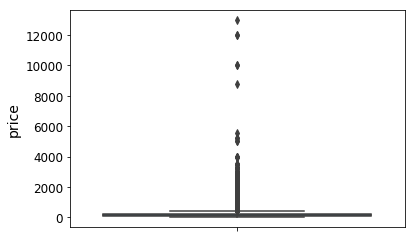

In [97]:
sns.boxplot(y=df_final['price']);

From the boxplot, we see a few values with very high prices. However, majority of the prices seem to lie between 100 to 200. 

In [98]:
# Let us check for skew, 0 being perfectly symmetrical

df_final['price'].skew()

13.808558337216192

In [99]:
# We can also use Kurtosis to analyze our data
# “Kurtosis is the degree of peakedness of a distribution” – Wolfram MathWorld

df_final['price'].kurtosis()

413.4301463784445

In [100]:
# In order to remove outliers, let us consider only 99.5% of the data. We will remove top .25% and bottom .25% of the values

df_final = df_final[df_final['price']<df_final['price'].quantile(0.995)].reset_index(drop=True)

print(df_final['price'].quantile(0.995)) # Returns max value present after outlier removal
print('mean: ', df_final['price'].mean())
print('median: ',df_final['price'].median())

# Let us check if there is any improvement in skew/Kurtosis
print('skew', df_final['price'].skew())
print('kurtosis', df_final['price'].kurtosis())

1250.0
mean:  196.0654635921429
median:  132.0
skew 2.957872457159033
kurtosis 11.18710844862683


In [101]:
df_final.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,65.0,Potts Point,151.226562,-33.869168,92.0,177,2,0.0,0.0,1,NaN,1.0,1.0,Apartment,Private room,339,0,1,2009-09-23,moderate
1,98.0,Pyrmont,151.191896,-33.865153,95.0,468,2,0.0,55.0,2,1.0,1.0,1.0,Townhouse,Private room,188,1,0,2009-05-14,strict_14_with_grace_period
2,469.0,Balgowlah,151.261722,-33.800929,100.0,1,5,900.0,100.0,6,3.0,3.0,3.0,House,Entire home/apt,168,1,0,2009-11-20,strict_14_with_grace_period
3,63.0,Redfern,151.200450,-33.890765,89.0,172,2,0.0,0.0,2,1.0,1.0,1.0,Apartment,Private room,215,1,0,2009-11-30,moderate
4,39.0,Redfern,151.200896,-33.889667,90.0,147,2,0.0,0.0,1,2.0,1.0,1.0,Apartment,Shared room,287,1,0,2009-11-30,moderate


In [102]:
# Let us check out data for null values

df_final.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified       0
host_is_superhost            0
host_since                  34
cancellation_policy          0
dtype: int64

In [103]:
print(df["cancellation_policy"].value_counts())
print(df["city"].value_counts())
print(df["property_type"].value_counts())
print(df["room_type"].value_counts())

strict_14_with_grace_period    11692
flexible                        8567
moderate                        6777
super_strict_60                   32
super_strict_30                    2
Name: cancellation_policy, dtype: int64
Bondi Beach                   1676
Manly                          962
Surry Hills                    920
Bondi                          788
Randwick                       686
Sydney                         684
Coogee                         675
Darlinghurst                   661
North Bondi                    632
Newtown                        490
Redfern                        479
Paddington                     444
Maroubra                       443
Bondi Junction                 416
Mosman                         397
Potts Point                    380
Bronte                         372
Pyrmont                        308
Waterloo                       300
Glebe                          259
Dee Why                        255
Rose Bay                       250
Belle

In [104]:
df_final.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365,host_identity_verified,host_is_superhost
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000,26931.000000,26931.000000
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,293.870261,65.268687,3.357395,1.340964,1.600787,1.996542,101.575916,0.468902,0.126583
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,549.642202,84.886663,2.160004,0.638187,1.091213,1.506535,127.822623,0.499041,0.332511
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.000000,0.000000,0.000000
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,400.000000,99.000000,4.000000,1.500000,2.000000,2.000000,179.000000,1.000000,0.000000
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000,1.000000,1.000000


### TO-DO: From the above table it looks like there are some outliers in minimum_nights and security_deposit because the std is a little off. Check.

# Data Exploration

Saving figure attribute_histogram_plots


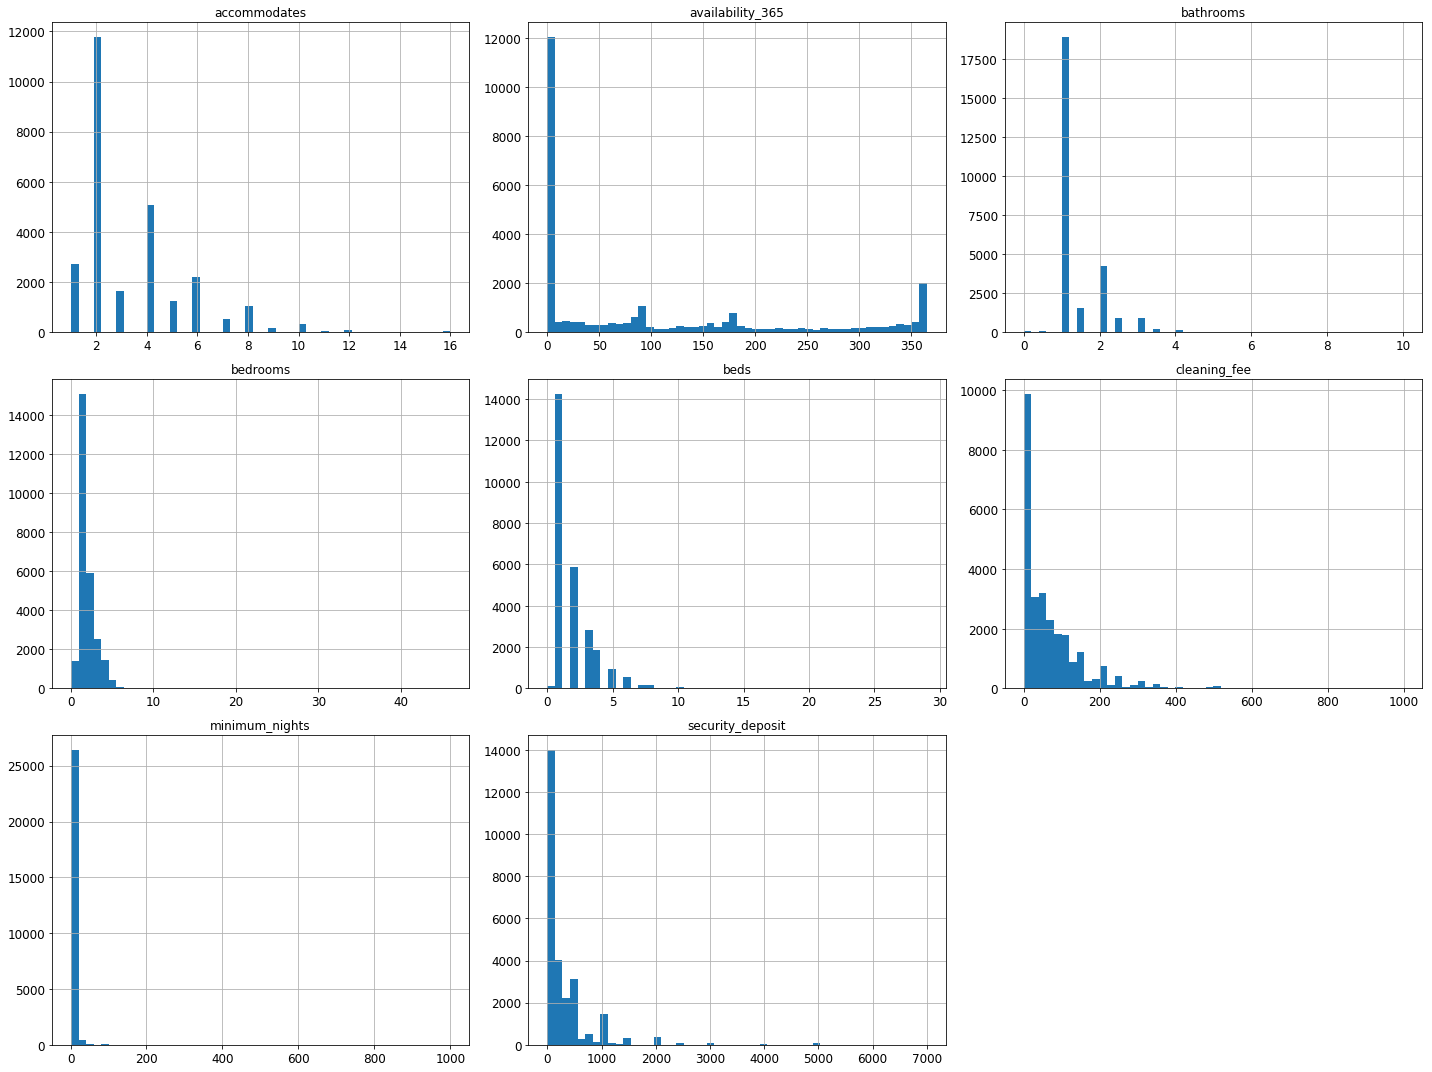

In [105]:
try:
    # Let us plot the data distribution of columns starting from 'minimum_nights' to 'availability_365'
    df_final.loc[:, 'minimum_nights':'availability_365'].hist(bins=50, figsize=(20,15))
    save_fig("attribute_histogram_plots")
    plt.show()
except AttributeError:
    pass

In [106]:
df_final['city'].value_counts().head(25)

Bondi Beach       1671
Manly              958
Surry Hills        919
Bondi              785
Randwick           684
Sydney             682
Coogee             675
Darlinghurst       660
North Bondi        629
Newtown            490
Redfern            479
Maroubra           443
Paddington         443
Bondi Junction     416
Mosman             385
Potts Point        380
Bronte             367
Pyrmont            307
Waterloo           300
Glebe              259
Dee Why            255
Rose Bay           247
Freshwater         245
Bellevue Hill      241
Avalon Beach       232
Name: city, dtype: int64

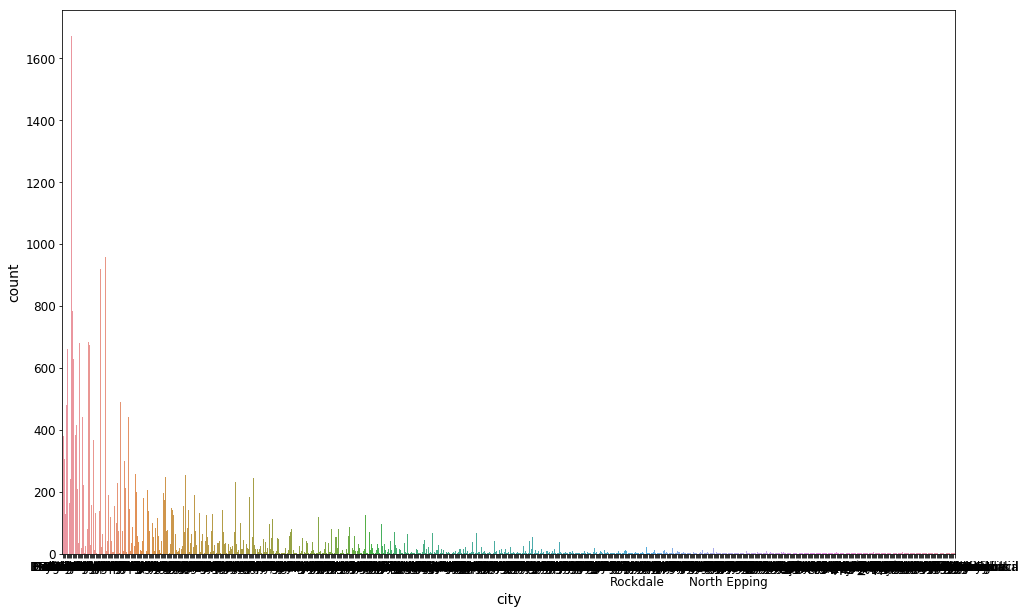

In [107]:
plt.figure(figsize=(16,10))
ax = sns.countplot(x='city', data=df_final)

In [108]:
# For the purpose of our task, we will keep top 20 cities although our customer has asked for just Bondi beach

df_final = df_final[df_final['city'].isin(df_final['city'].value_counts().head(20).index)].reset_index(drop=True)

In [109]:
# We now remove the rare occurences in categories as it's necessary for the cross validation step
# the below step is somewhat similar for what has been done with cities above

item_counts = df_final.groupby('property_type').size()

# Store a list of the rare property types here i.e. the types that have a count less than 10 
rare_items = item_counts[item_counts <= 10].index.values

# drop the property types that were rare
df_final = df_final[~df_final['property_type'].isin(rare_items)].reset_index(drop=True)

# Sanity check
df_final["property_type"].value_counts()

Apartment             8303
House                 2515
Townhouse              475
Condominium            177
Loft                    92
Guest suite             71
Other                   53
Guesthouse              47
Bed and breakfast       39
Hostel                  38
Villa                   30
Serviced apartment      28
Bungalow                16
Cottage                 11
Name: property_type, dtype: int64

In [133]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_final, test_size=0.2, random_state=42)
test.sample(3).T

,3891,5833,9515
price,139,55,200
city,Maroubra,Maroubra,Surry Hills
longitude,151.24,151.243,151.21
latitude,-33.9441,-33.9483,-33.8814
review_scores_rating,NaN,100,70
number_of_reviews,0,2,2
minimum_nights,1,3,1
security_deposit,0,0,0
cleaning_fee,0,30,80
accommodates,4,2,7


In [134]:
# We need to convert our categorical columns to numeric, so we use the sklearn's funtion LabelEncoder to do this

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df_final['city_code'] = le.fit_transform(df_final['city'])

## Stratified Shuffle Split cross-validator

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.

In [135]:
from sklearn.model_selection import StratifiedShuffleSplit

# Let us stratify according to city

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df_final, df_final['city_code']):
    del df_final['city_code']
    print(train_index, test_index)
    strat_train_set = df_final.loc[train_index]
    strat_test_set = df_final.loc[test_index]

[4711 8500 5296 ... 5793 2987 4157] [ 3548  2751  1278 ... 10178  6898  1910]


In [136]:
# Average price per area
strat_test_set.groupby('city')['price'].mean()

city
Bondi             182.866242
Bondi Beach       197.843844
Bondi Junction    173.686747
Bronte            313.602740
Coogee            217.562963
Darlinghurst      163.576923
Glebe             135.941176
Manly             269.863874
Maroubra          148.528090
Mosman            381.948052
Newtown           122.244898
North Bondi       247.722222
Paddington        220.235955
Potts Point       164.460526
Pyrmont           192.459016
Randwick          157.145985
Redfern           125.166667
Surry Hills       150.464481
Sydney            192.992537
Waterloo          125.750000
Name: price, dtype: float64

# Further Data Exploration and Visualization

In [172]:
traval = strat_train_set.copy() ##traval - training and validation set

Saving figure bad_visualization_plot


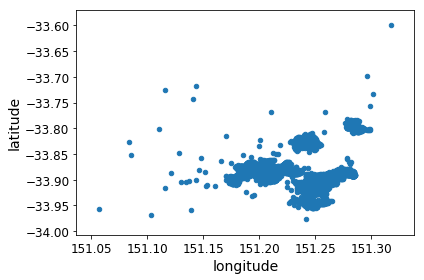

In [173]:
# Let's plot our cordinates which is a way of visualizing a map of the locations

traval.plot(kind='scatter', x='longitude', y='latitude')
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot


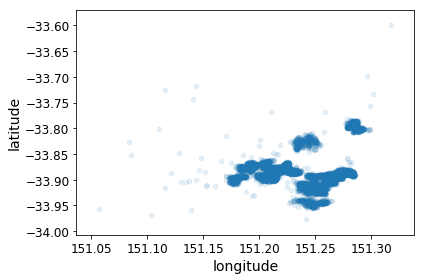

In [174]:
traval.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
save_fig("better_visualization_plot")

In [175]:
# Let's narrow our visual map and remove locations outside the main area

traval_co = traval[(traval['longitude']>151.16)&(traval['latitude']<-33.75)].reset_index(drop=True)
traval_co = traval_co[traval_co['latitude']>-33.95].reset_index(drop=True)

# And look at only locations under $600
traval_co = traval_co[traval_co['price']<600].reset_index(drop=True)

Saving figure housing_prices_scatterplot


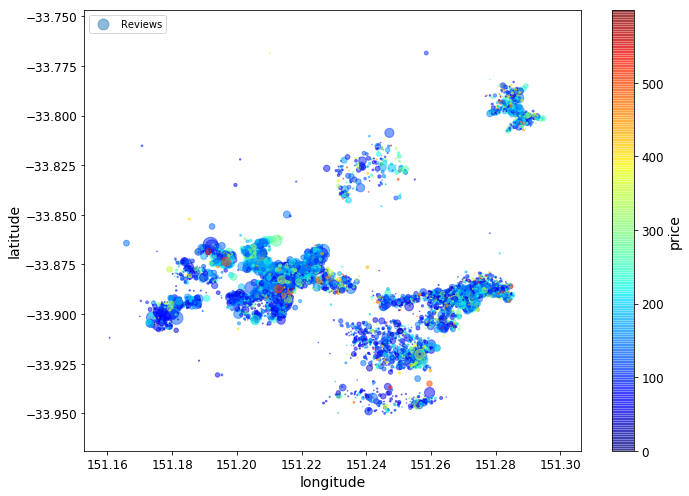

In [176]:
# The argument sharex=False fixes a display bug. refer: https://github.com/pandas-dev/pandas/issues/10611

traval_co.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5, label='Reviews',
               figsize=(10,7), c='price', cmap=plt.get_cmap("jet"), colorbar=True, 
               s = traval_co['number_of_reviews']/2, sharex=False)

plt.legend()
save_fig("housing_prices_scatterplot")

In [177]:
traval_co.shape

(9066, 20)

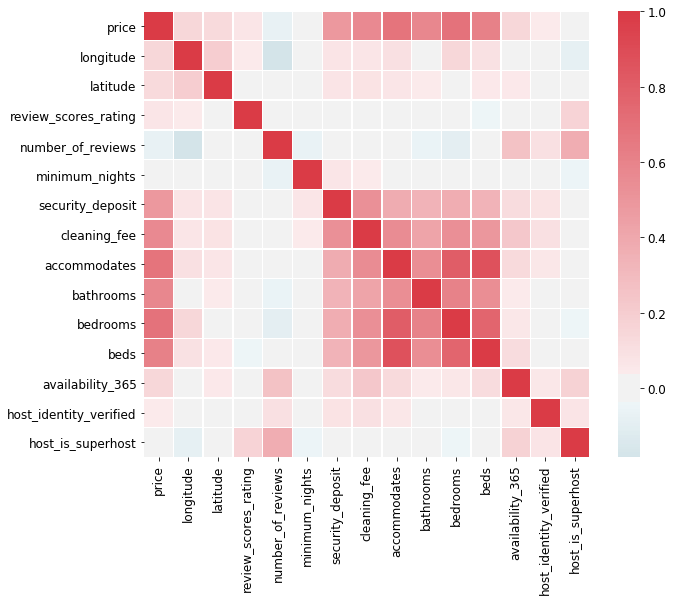

In [178]:
# Now let's explore our correlation matrix

corr_matrix = traval.corr()

# Heatmap
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values, 
            cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82});

In [179]:
corr_matrix['price'].sort_values(ascending=False)

price                     1.000000
bedrooms                  0.691435
accommodates              0.685610
beds                      0.609951
bathrooms                 0.581509
cleaning_fee              0.563228
security_deposit          0.490407
availability_365          0.149026
longitude                 0.148791
latitude                  0.130703
review_scores_rating      0.064510
host_identity_verified    0.045658
minimum_nights            0.020461
host_is_superhost        -0.022406
number_of_reviews        -0.075250
Name: price, dtype: float64

Saving figure scatter_matrix_plot


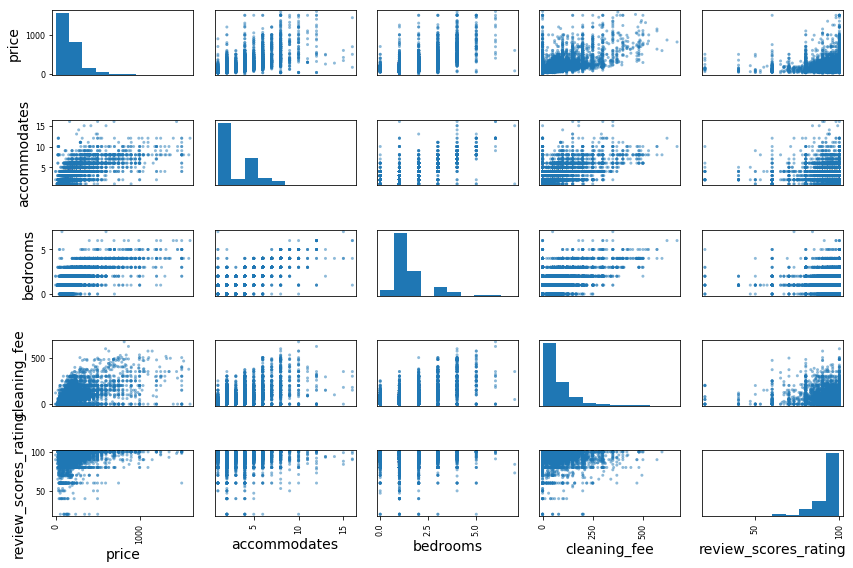

In [180]:
from pandas.plotting import scatter_matrix

attributes = ["price", "accommodates", "bedrooms",
              "cleaning_fee","review_scores_rating"]
scatter_matrix(traval[attributes], figsize=(12,8))
save_fig("scatter_matrix_plot")

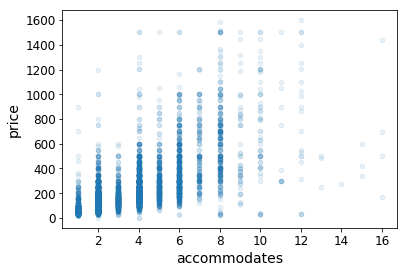

In [181]:
traval.plot(kind='scatter', x='accommodates', y='price', alpha=0.1)
plt.show()

In [182]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.707000e+04,2.707000e+04,27035.000000,27035.000000,0.0,27070.000000,27070.000000,27070.000000,27048.000000,27062.000000,...,27070.000000,19512.000000,19463.000000,19484.000000,19437.000000,19479.000000,19437.000000,19431.000000,27070.000000,20246.000000
mean,1.402672e+07,4.692847e+07,7.626669,7.626669,NaN,-33.862368,151.210667,3.383598,1.352337,1.614071,...,14.005689,93.412413,9.551765,9.243328,9.745331,9.742389,9.647785,9.329885,6.154378,0.971807
std,6.520952e+06,4.525669e+07,27.355935,27.355935,NaN,0.072260,0.079451,2.196864,0.664092,1.109725,...,29.808917,9.354959,0.910934,1.192833,0.747204,0.775011,0.731454,0.999883,21.411039,1.458915
min,1.115600e+04,8.346000e+03,0.000000,0.000000,NaN,-34.135212,150.644964,1.000000,0.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,9.083668e+06,1.108913e+07,1.000000,1.000000,NaN,-33.897603,151.184472,2.000000,1.000000,1.000000,...,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.140000
50%,1.544074e+07,3.016545e+07,1.000000,1.000000,NaN,-33.883064,151.223242,2.000000,1.000000,1.000000,...,3.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.360000
75%,2.015561e+07,6.754591e+07,2.000000,2.000000,NaN,-33.831850,151.264889,4.000000,1.500000,2.000000,...,13.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,1.190000
max,2.270966e+07,1.674985e+08,461.000000,461.000000,NaN,-33.389728,151.339811,16.000000,10.000000,46.000000,...,468.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,177.000000,64.660000


In [183]:
# TO-DO: Try the feature hashing trick: Method 3: Feature hashing (a.k.a the hashing trick)

# from sklearn.feature_extraction import FeatureHasher
# X_train_hash = copy.copy(X_train)
# X_test_hash = copy.copy(X_test)
# for i in range(X_train_hash.shape[1]):
#     X_train_hash.iloc[:,i]=X_train_hash.iloc[:,i].astype('str')
# for i in range(X_test_hash.shape[1]):
#     X_test_hash.iloc[:,i]=X_test_hash.iloc[:,i].astype('str')
# h = FeatureHasher(n_features=100,input_type="string")
# X_train_hash = h.transform(X_train_hash.values)
# X_test_hash = h.transform(X_test_hash.values)
# l.fit(X_train_hash,y_train)
# y_pred = l.predict_proba(X_test_hash)
# print(log_loss(y_test,y_pred))#0.4
# r.fit(X_train_hash,y_train)
# y_pred = r.predict_proba(X_test_hash)
# print(log_loss(y_test,y_pred))

Let us create two new variables that tell the ratio of bedrooms and bathrooms per person. - number of Bedrooms per person, bathroom per person., 
Let us also feature engineer the date column host since to days on airbnb.

In [184]:
traval["bedrooms_per_person"] = traval["bedrooms"]/traval["accommodates"]
traval["bathrooms_per_person"] = traval["bathrooms"]/traval["accommodates"]
traval["days_on_airbnb"] = (pd.to_datetime('today') - traval['host_since']).dt.days

In [203]:
traval.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy,bedrooms_per_person,bathrooms_per_person,days_on_airbnb
4711,175.0,Manly,151.282967,-33.793324,94.0,63,2,200.0,80.0,4,1.0,1.0,2.0,Apartment,Entire home/apt,312,0,0,2016-03-03,strict_14_with_grace_period,0.250000,0.250000,1433.0
8500,100.0,Potts Point,151.223666,-33.867081,93.0,3,3,0.0,79.0,4,1.0,0.0,1.0,Apartment,Entire home/apt,0,0,0,2013-10-30,flexible,0.000000,0.250000,2288.0
5296,300.0,Manly,151.285564,-33.793127,98.0,9,4,500.0,50.0,4,2.0,2.0,2.0,Townhouse,Entire home/apt,0,1,0,2013-07-21,strict_14_with_grace_period,0.500000,0.500000,2389.0
9454,45.0,Surry Hills,151.215094,-33.881693,NaN,0,1,0.0,0.0,1,2.0,1.0,1.0,Townhouse,Private room,0,1,0,2011-07-21,flexible,1.000000,2.000000,3120.0
11519,260.0,Pyrmont,151.197754,-33.870086,98.0,8,2,0.0,180.0,6,2.0,2.0,2.0,Apartment,Entire home/apt,160,0,1,2017-10-19,strict_14_with_grace_period,0.333333,0.333333,838.0


# Prepare data for Machine Learning

In [186]:
# Let us remove our target variable price from traval dataset

Y = traval['price']
X = traval.drop('price', axis=1)

In [200]:
print(f'Total rows containing missing values {len(X[X.isnull().any(axis=1)])}')
print(f'Total number of rows {len(X)}')

X.isnull().sum()

Total rows containing missing values 2677
Total number of rows 9516


city                         0
longitude                    0
latitude                     0
review_scores_rating      2658
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                    7
bedrooms                     3
beds                        10
property_type                0
room_type                    0
availability_365             0
host_identity_verified       0
host_is_superhost            0
host_since                  14
cancellation_policy          0
bedrooms_per_person          3
bathrooms_per_person         7
days_on_airbnb              14
dtype: int64

From the above it looks like the review_scores_rating column has the max number of nulls. We have few options to impute null values.
1. Delete all rows containing null values
2. Delete columns with null values
3. Impute using mean/median or other methods like using sklearn's IterativeImputer, KNN etc., 

In [225]:
# Let us separate the numerical and categorical columns since both require different methods of imputation.

non_numeric_cols = ["city","cancellation_policy","host_since","room_type","property_type",]
numerical_cols = X.columns[~X.columns.isin(categorical_cols)]

X_num = X[numerical_cols]
X_cat = X.select_dtypes(include=[object])

X_cat.head()

,city,property_type,room_type,cancellation_policy
4711,Manly,Apartment,Entire home/apt,strict_14_with_grace_period
8500,Potts Point,Apartment,Entire home/apt,flexible
5296,Manly,Townhouse,Entire home/apt,strict_14_with_grace_period
9454,Surry Hills,Townhouse,Private room,flexible
11519,Pyrmont,Apartment,Entire home/apt,strict_14_with_grace_period


In [214]:
# Let us impute numerical_cols using median

from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
imputer.fit(X_num) # Similar to computing median for every column

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [215]:
imputer.statistics_

array([ 1.51246772e+02, -3.38888301e+01,  9.60000000e+01,  3.00000000e+00,
        3.00000000e+00,  0.00000000e+00,  5.00000000e+01,  2.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  7.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  5.00000000e-01,  5.00000000e-01,
        1.89050000e+03])

In [221]:
X_num_imputed = imputer.transform(X_num)

# Reconstruct X_num to accomodate imputed values
X_num = pd.DataFrame(X_num_imputed, columns=X_num.columns, index=list(X_num.index.values))

In [227]:
# The categorical features do not have null values, so we don't have to impute them.

X_cat.isnull().sum()

city                   0
property_type          0
room_type              0
cancellation_policy    0
dtype: int64

In [ ]:
# Let us encode all the variables so that it is ready for the 

In [232]:
# Use get_dummies since all categorical columns are nominal and have string values

test = pd.get_dummies(X_cat)
test.head()

,city_Bondi,city_Bondi Beach,city_Bondi Junction,city_Bronte,city_Coogee,city_Darlinghurst,city_Glebe,city_Manly,city_Maroubra,city_Mosman,city_Newtown,city_North Bondi,city_Paddington,city_Potts Point,city_Pyrmont,city_Randwick,city_Redfern,city_Surry Hills,city_Sydney,city_Waterloo,property_type_Apartment,property_type_Bed and breakfast,property_type_Bungalow,property_type_Condominium,property_type_Cottage,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_60
4711,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8500,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
5296,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9454,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
11519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


### Let us create a pipeline for preprocessing from the techniques used so far so that it comes in handy during cross-validation.

In [234]:
from sklearn.base import BaseEstimator, TransformerMixin
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [235]:
# Custom transformer to convert a numpy array to pandas for features and then convert back to array for output.

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, popularity=True, num_cols=[]):
        self.popularity = popularity
        
    def fit(self, X, y=None):
        return self # Nothing to do
    
    def transform(self, X, y=None):
        
        # Feature Engineering
        X = pd.DataFrame(X, columns=num_cols)
        X["bedrooms_per_person"] = X["bedrooms"]/X["accommodates"]
        X["bathrooms_per_person"] = X["bathrooms"]/X["accommodates"]
        
        global feats
        feats = ["bedrooms_per_person","bathrooms_per_person"]

        if self.popularity:
            X["past_and_future_popularity"]=X["number_of_reviews"]/(X["availability_365"]+1)
            feats.append("past_and_future_popularity")
            
            return X.values
        
        return X.values

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

strat_train_set2 = strat_train_set.dropna()
X = strat_train_set2.copy().drop("price",axis=1)
Y = strat_train_set2["price"]

num_cols = list(X.select_dtypes(include=numerics).columns)
cat_cols = list(X.select_dtypes(include=[object]).columns)

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder(num_cols=num_cols,popularity=True)),
    ('std_scaler', StandardScaler()),
])

In [238]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import itertools

mid_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

In [245]:
mid_pipeline.fit(X)
cat_encoder = mid_pipeline.named_transformers_["cat"]
sublists = [list(bas) for bas in cat_encoder.categories_]
one_cols = list(itertools.chain(*sublists))

## In this class, I will be converting numpy back to pandas
class ToPandasDF(BaseEstimator, TransformerMixin):
    def __init__(self, fit_index=[]):
        self.fit_index = fit_index
        
    def fit(self, X_df, y=None):
        return self
    
    def transform(self, X_df, y=None):
        global cols
        # add categorical, numeric and feature engineered cols
        cols = num_cols.copy()
        cols.extend(feats) 
        cols.extend(one_cols)
        X_df = pd.DataFrame(X_df, columns=cols, index=self.fit_index)
        
        return X_df
    
def pipe(inds):
    return Pipeline([
            ("mid", mid_pipeline),
            ("PD", ToPandasDF(inds)),
        ])
    
params = {"inds" : list(X.index)}

X_pr = pipe(**params).fit_transform(X) 

Now we have done all the preprocessing instead of doing it bit by bit. The pipeline becomes extremely handy in the cross-validation step.

In [189]:
# Defining a sample client data as per the above description

from dateutil import parser

dict_client = {'city': 'Bondi Beach',
               'longitude': 151.274506,
               'latitude': -33.889087,
               'review_scores_rating': 95,
               'number_of_reviews':53,
               'minimum_nights': 4,
               'accommodates': 10,
               'bathrooms': 3,
               'bedrooms': 5,
               'beds': 7,
               'security_deposit': 1500,
               'cleaning_fee': 370,
               'property_type': 'House',
               'room_type': 'Entire home/apt',
               'availability_365': 255,
               'host_identity_verified': 1, ### 1 for yes, 0 for no
               'host_is_superhost': 1,
               'cancellation_policy': 'strict_14_with_grace_period',
               'host_since': parser.parse("01-08-2010")
              }

This notebook takes inspiration from: Derek Snow [https://www.linkedin.com/in/snowderek/] and Rajeev Ratan [https://www.linkedin.com/in/rajeevratan/]